<a href="https://colab.research.google.com/github/rohan-dot/Startups-Funding/blob/main/Rohan_Datta_Purkayastha_Team_1_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 5/Week 1/Day 1/data_driven_investment_1.csv')

In [4]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


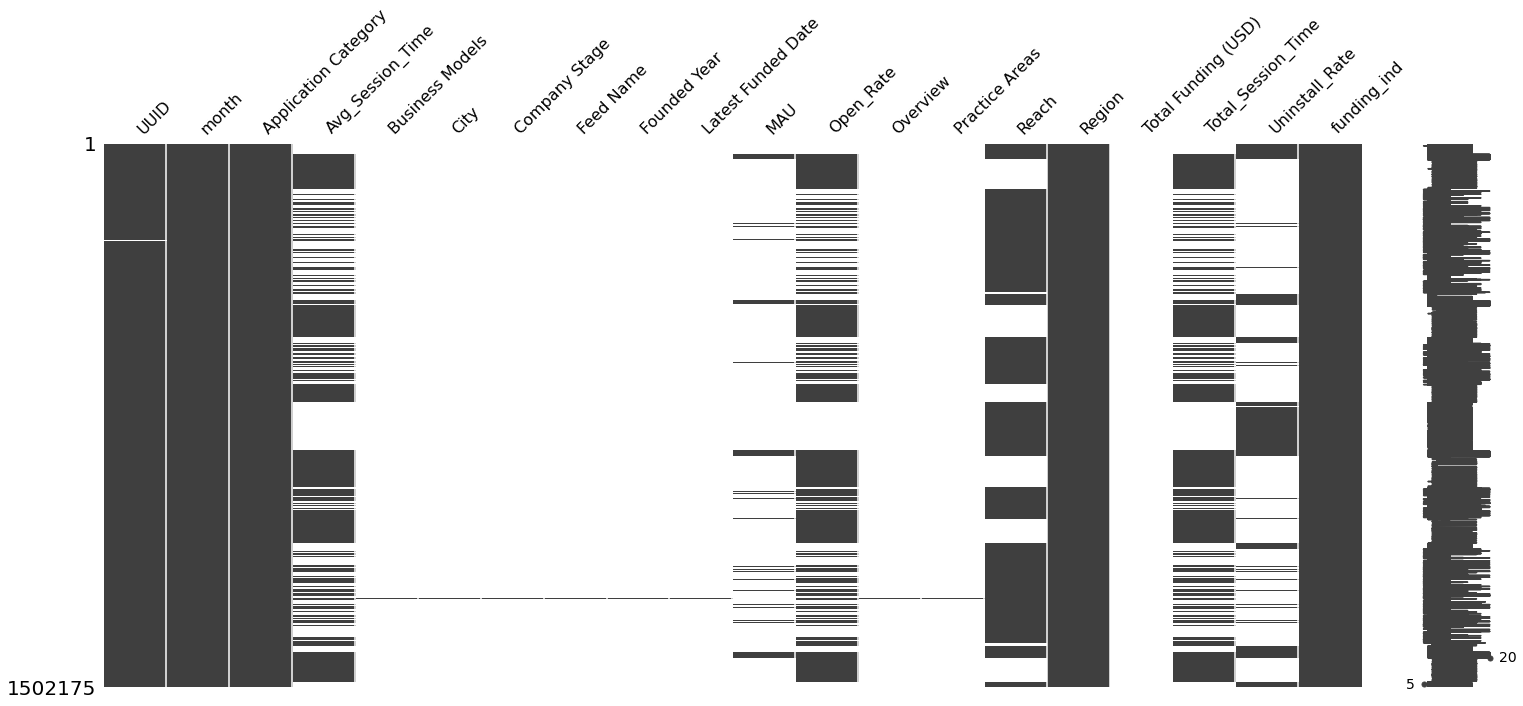

In [5]:
import missingno as msno
msno.matrix(df)

In [6]:
df.isnull().sum()

UUID                       1482
month                         0
Application Category          0
Avg_Session_Time         624443
Business Models         1499761
City                    1499768
Company Stage           1499761
Feed Name               1499761
Founded Year            1499761
Latest Funded Date      1499761
MAU                     1384088
Open_Rate                624460
Overview                1499761
Practice Areas          1499761
Reach                    451300
Region                        0
Total Funding (USD)     1499920
Total_Session_Time       624510
Uninstall_Rate          1149906
funding_ind                   0
dtype: int64

# We see a lot of missing values

In [7]:
df['Business Models'].value_counts()

Social Platforms > Interest Based > Education > Higher Education > Q&A Platforms\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced                                               232
OTT Video > OTT Streaming Platforms > Video On Demand (VOD) > News                                                                                                                                  124
K-12 EdTech > B2C Learning Solutions > School Curriculum > Multi Subject > Horizontal\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced\nY Combinator Batches > 2020 > Winter    117
Food & Beverage Products > Beverages > Juices and Dilutables > Juices > Cold-pressed                                                                                                                113
Influencer E-Commerce > Live Video\nVideo Commerce > Live Stream Commerce                                                                                                                           107


In [8]:
df[~df['Business Models'].isna()]['City'].isnull().sum()

7

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


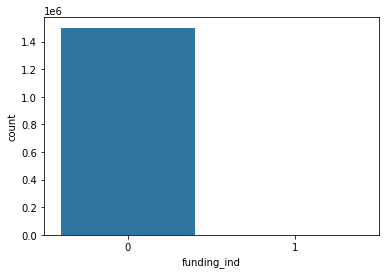

In [9]:
sns.countplot(df['funding_ind'])

In [10]:
df['funding_ind'].value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

In [11]:
df['Region'].value_counts()

National    1502175
Name: Region, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


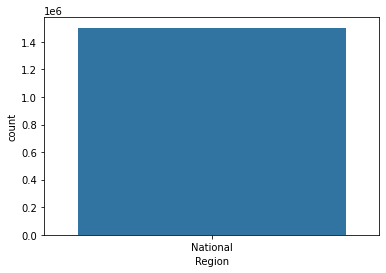

In [12]:
sns.countplot(df['Region'])

# So, Region column contains only a single value i.e National

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.drop('Region', axis = 1, inplace = True)

In [15]:
df['month'].value_counts()

20200301    248280
20200401    233496
20200601    157677
20200501    149966
20200201    104186
20200101    102073
20191201     96524
20191101     82189
20190901     16079
20190801     16079
20190701     16079
20191001     16078
20190601     15952
20190501     15799
20190401     15552
20190301     15262
20190201     14967
20190101     14717
20181201     14397
20181101     14138
20181001     13800
20180901     13527
20180801     13207
20180701     12739
Name: month, dtype: int64

In [16]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,NaN,NaN,0.312500,0


In [17]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,NaN,NaN,0.312500,0


In [18]:
df.dtypes

UUID                     object
month                     int64
Application Category     object
Avg_Session_Time        float64
Business Models          object
City                     object
Company Stage            object
Feed Name                object
Founded Year            float64
Latest Funded Date       object
MAU                     float64
Open_Rate               float64
Overview                 object
Practice Areas           object
Reach                   float64
Total Funding (USD)     float64
Total_Session_Time      float64
Uninstall_Rate          float64
funding_ind               int64
dtype: object

In [19]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
df['Month'] = df['month'].astype('string').apply(lambda x: (str(x)[4:6]))

In [20]:
df['Month'] = df['Month'].astype('int')

In [21]:
import datetime

In [22]:
df['Month_Name'] = df['Month'].apply(lambda x: datetime.date(1900, x, 1).strftime('%b'))

In [23]:
df['Month_Name']

0          Aug
1          Aug
2          Aug
3          Aug
4          Aug
          ... 
1502170    Jan
1502171    Jan
1502172    Jan
1502173    Jan
1502174    Jan
Name: Month_Name, Length: 1412763, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


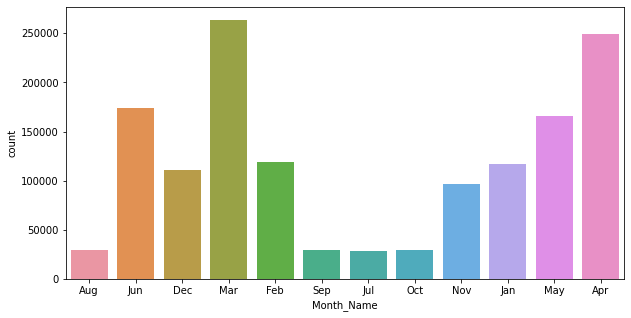

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df['Month_Name'])

# We have app datas mostly from March month

In [25]:
def datetime(x):
  import datetime
  x=str(x)
  a=int(x[0:4])
  b=int(x[4:6])
  c=int(x[6:])
  

  x = datetime.datetime(a, b, c)
  x.strftime("%Y %b %d")

  return x

In [26]:
df['Month1']=df['month'].apply(lambda x:datetime(x))

In [27]:
df['user_created_at_year_month'] = df['Month1'].dt.strftime('%Y-%m')

In [28]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month_Name,Month1,user_created_at_year_month
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,NaN,NaN,0.024443,0,8,Aug,2018-08-01,2018-08
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,NaN,NaN,0.009828,0,8,Aug,2018-08-01,2018-08
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,NaN,NaN,0.235294,0,8,Aug,2018-08-01,2018-08
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,0.350000,0,8,Aug,2018-08-01,2018-08
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,NaN,NaN,0.312500,0,8,Aug,2018-08-01,2018-08


In [29]:
df.drop(['month', 'Month_Name'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


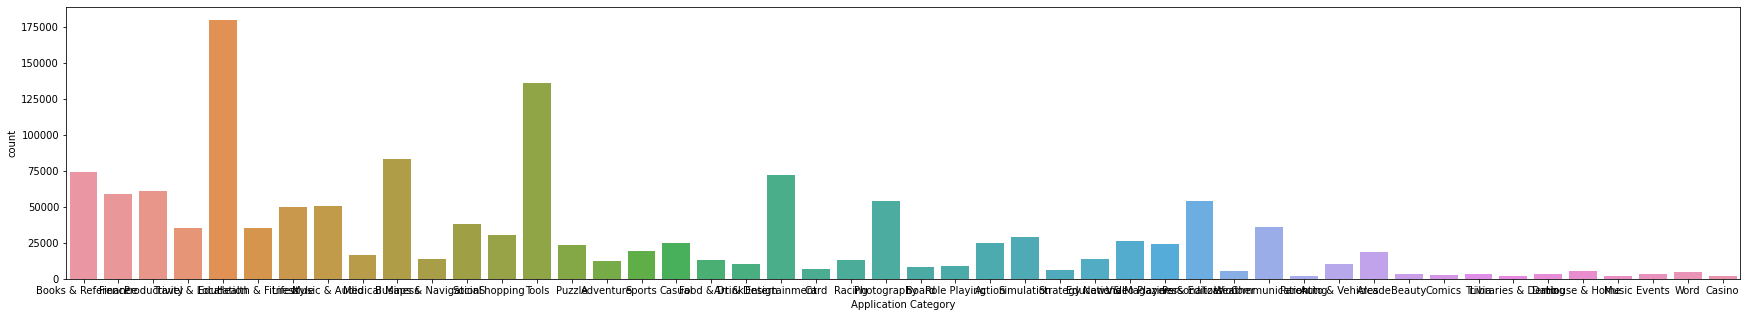

In [30]:
plt.figure(figsize=(30,5))
sns.countplot(df['Application Category'])

In [30]:
df[~df['Avg_Session_Time'].isna()]['Avg_Session_Time']

29180      0.948620
29181      1.285343
29182      2.742948
29183      1.040757
29184      0.531213
             ...   
1487446    0.522869
1487447    0.374176
1487448    0.940800
1487449    0.361347
1487450    1.346300
Name: Avg_Session_Time, Length: 877732, dtype: float64

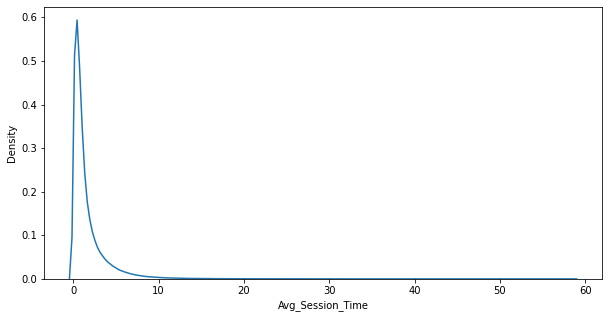

In [31]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Avg_Session_Time'].dropna())

In [32]:
df['Company Stage'].unique()

array([nan, 'Series A', 'Seed', 'Series B', 'Series D', 'Series C',
       'Series H', 'Acquired', 'Series E', 'Series I', 'Series F',
       'Funded', 'Series G'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


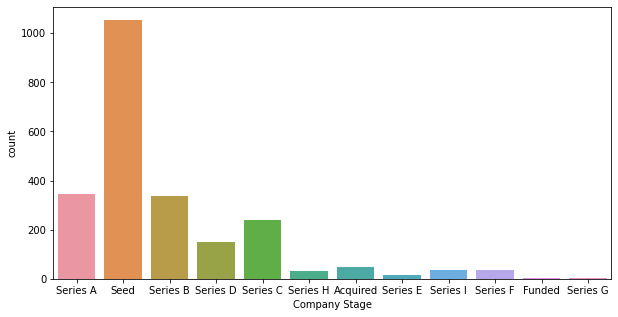

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(df['Company Stage'].dropna())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


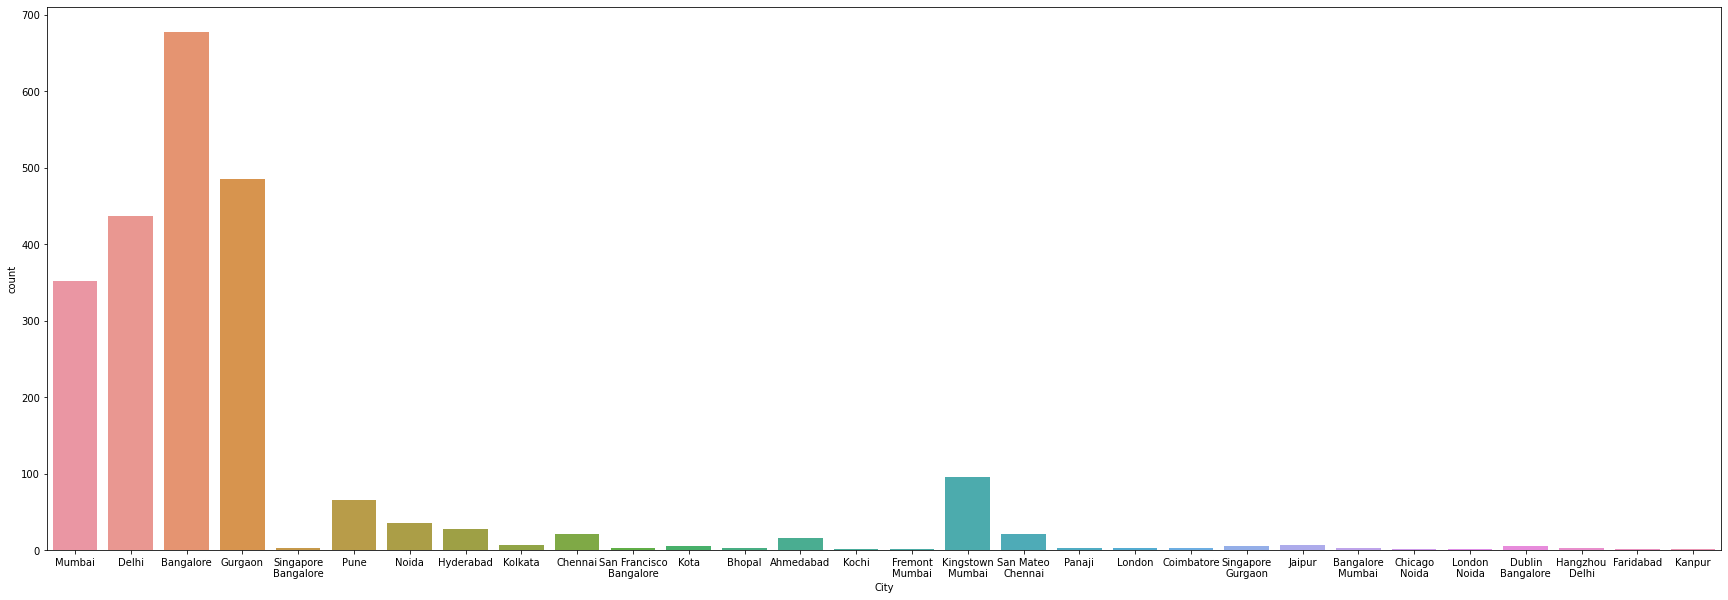

In [34]:
plt.figure(figsize=(30,10))
sns.countplot(df['City'].dropna())

In [35]:
df['Feed Name'].unique()

array([nan, 'Mom & Baby Care', 'Social Platforms', 'Investment Tech',
       'Online Travel', 'HRTech\nCross Border - India',
       'Cybersecurity\nPaaS\nAI Infrastructure\nInsurance IT',
       'Alternative Lending\nConsumer and SME Loans',
       'Fitness & Wellness Tech\nFood Tech\nCross Border - India',
       'Local Services\nFitness & Wellness Tech',
       'Payments\nBanking Tech', 'Horizontal E-Commerce',
       'Online Travel\nRoad Transport Tech\nOnline Rental\nY Combinator Batches',
       'Alternative Lending', 'Fitness & Wellness Tech',
       'Mobile Gaming\neSports', 'Higher Education Tech',
       'Continued Learning', 'Second Hand Goods',
       'Healthcare IT\nEmployee Health IT',
       'Social Platforms\nOnline Event Ticketing\nY Combinator Batches',
       'Social Platforms\nVernacular Platforms\nRadio Tech\nAxilor Ventures Batches',
       'Disease Self Management\nDiabetes',
       'Internet First Media\nY Combinator Batches',
       'Music Tech\nVernacular Plat

In [36]:
df['Business Models'].unique()

array([nan, 'Mom & Baby Care > Parenting > Community',
       'Social Platforms > Women',
       'Investment Tech > Online Trading Platforms > Public Market Funds > Mutual Funds',
       'Online Travel > Transportation > Train > Online Agency',
       'HRTech > HRMS > Suite > Enterprise\nCross Border - India > Enterprise > Enterprise Apps > HR Tech > HRMS',
       'Cybersecurity > Anti Fraud > Financial Fraud > Payment Fraud\nPaaS > Technology Platform > Artificial Intelligence\nAI Infrastructure > Machine Intelligence Systems > Workbenches\nInsurance IT > Insurance Policy Solutions > Insurance Software Suite > Diversified',
       'Alternative Lending > Online Lenders > Consumer Loans > Personal Loans > Marketplace\nConsumer and SME Loans > Consumer Loans > Personal Loans > Internet-First',
       'Fitness & Wellness Tech > Physical Fitness > Fitness and Diet Training Apps > Fitness & Nutrition > Personalized Coaching > Expert-Led\nFood Tech > Technology Enablers > Nutritionists > Mea

# Business models and feed name are similar feature which are explaining the type of business.

In [37]:
df['Founded Year'].unique()

array([  nan, 2017., 2013., 2016., 2014., 1995., 2012., 2015., 2008.,
       2018., 2000., 2011., 2007., 2010., 2009., 2019., 1984., 2020.,
       2006., 1983., 2004.])

In [38]:
df['Founded Year'].dtype

dtype('float64')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


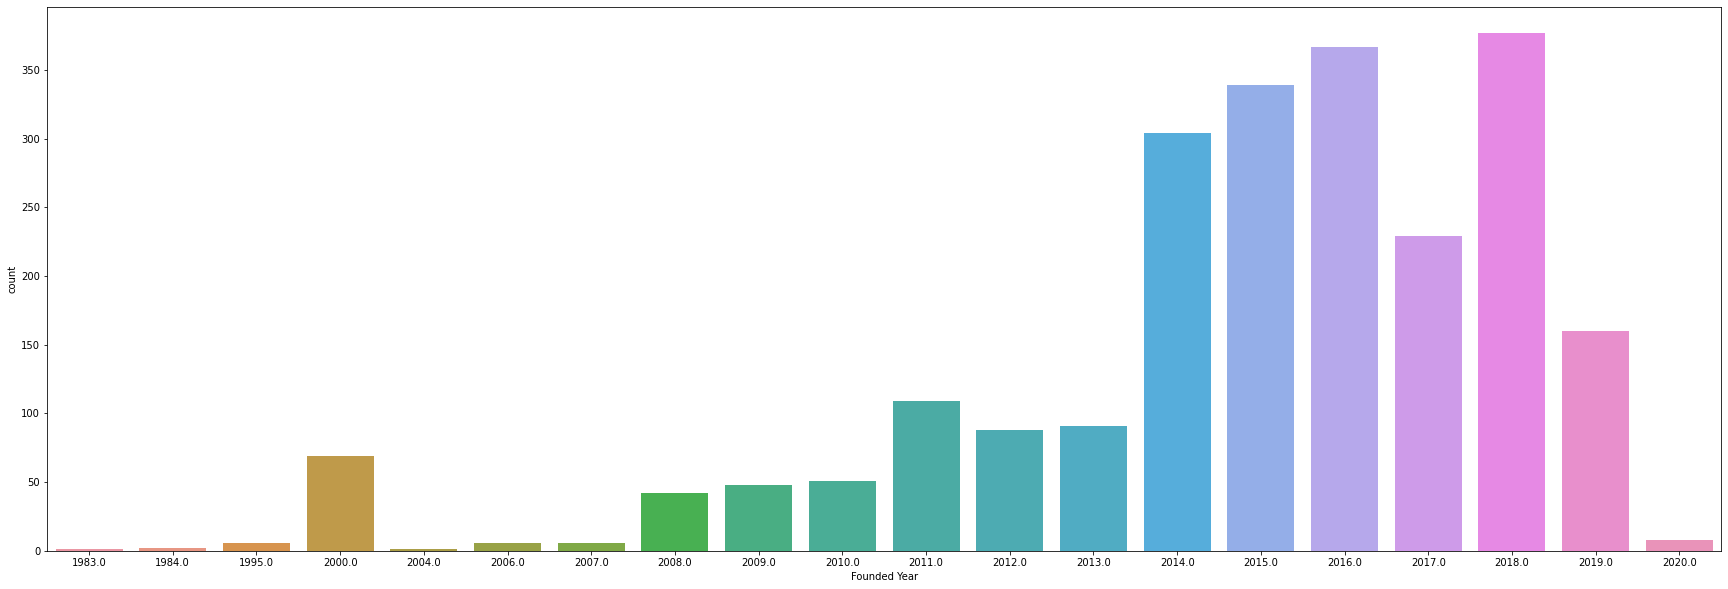

In [39]:
plt.figure(figsize=(30,10))
sns.countplot(df['Founded Year'].dropna())

In [40]:
funded_df = df[df['funding_ind']==1]
not_funded_df = df[df['funding_ind']==0]

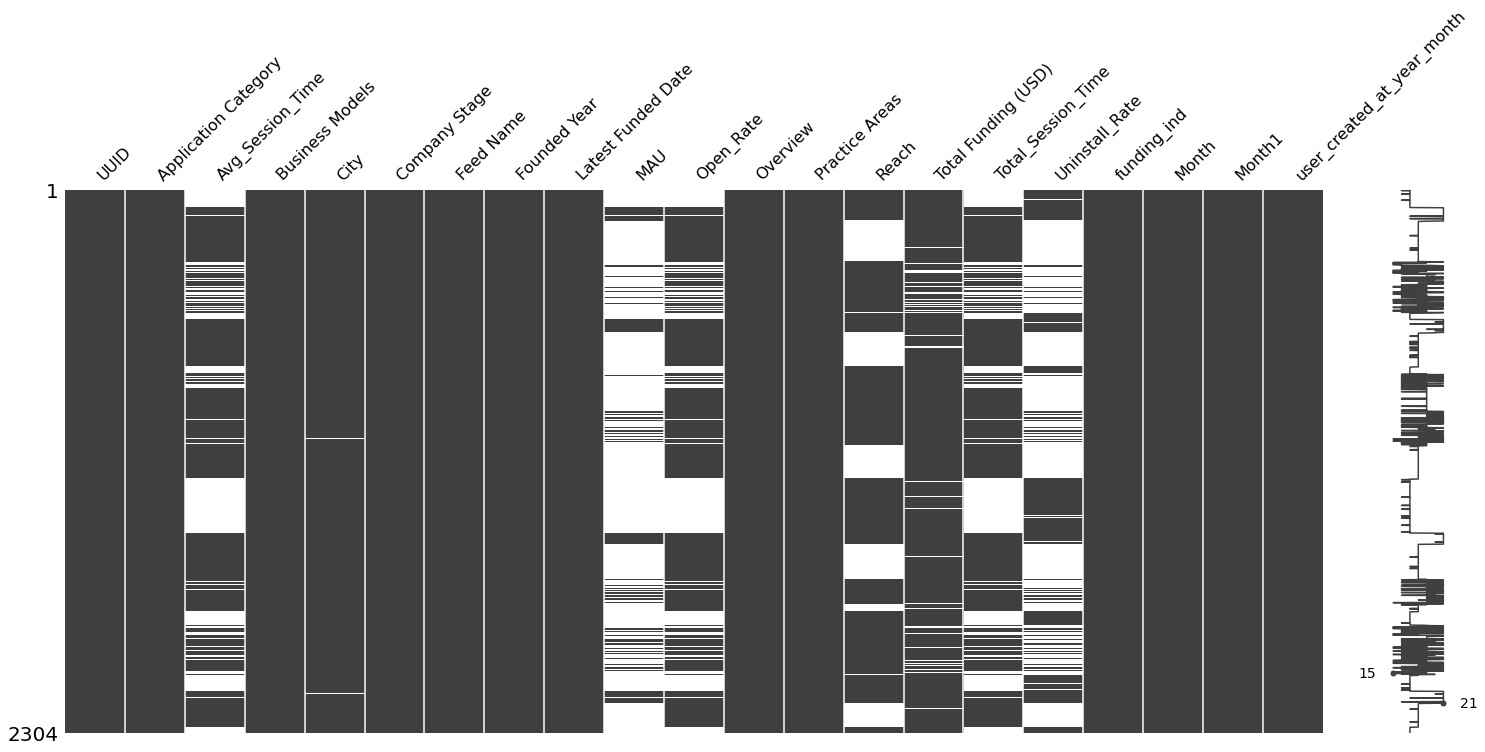

In [41]:
import missingno as msno
msno.matrix(funded_df)

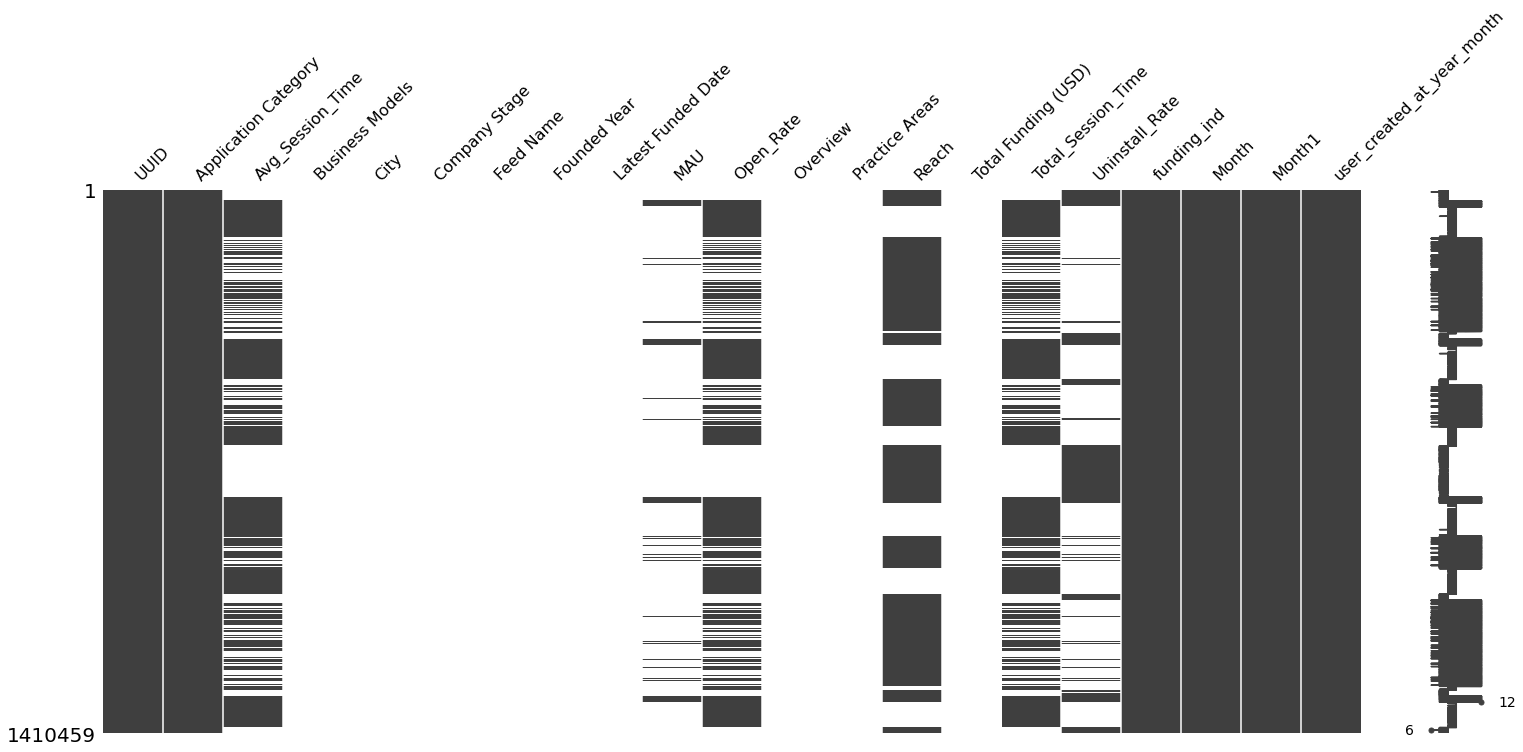

In [42]:
import missingno as msno
msno.matrix(not_funded_df)

In [43]:
not_funded_df[~not_funded_df['Uninstall_Rate'].isna()]

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
0,c1ad38e2d357610c129657d870ede902e8abfcb9,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,NaN,NaN,0.024443,0,8,2018-08-01,2018-08
1,d841e670d9191f896a0cbc75961920887b375756,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,NaN,NaN,0.009828,0,8,2018-08-01,2018-08
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,NaN,NaN,0.235294,0,8,2018-08-01,2018-08
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,0.350000,0,8,2018-08-01,2018-08
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,NaN,NaN,0.312500,0,8,2018-08-01,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502170,edea27844070caa246be7a15b4127b8f9f4f9bc5,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0,1,2019-01-01,2019-01
1502171,90b4546ebf64e49398e76af33073e8d97e66ecf9,Video Players & Editors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,1,2019-01-01,2019-01
1502172,53ad9d220cb359aef863b9dab2de3e5ce65ef6e1,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0,1,2019-01-01,2019-01
1502173,83016b735683928472e8043a51e5f9932e79db09,Tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,1,2019-01-01,2019-01


In [44]:
len(not_funded_df)

1410459

In [45]:
not_funded_df.isnull().sum()

UUID                              969
Application Category                0
Avg_Session_Time               534293
Business Models               1410459
City                          1410459
Company Stage                 1410459
Feed Name                     1410459
Founded Year                  1410459
Latest Funded Date            1410459
MAU                           1292780
Open_Rate                      534310
Overview                      1410459
Practice Areas                1410459
Reach                          450556
Total Funding (USD)           1410459
Total_Session_Time             534360
Uninstall_Rate                1059163
funding_ind                         0
Month                               0
Month1                              0
user_created_at_year_month          0
dtype: int64

In [46]:
not_funded_df.drop(['Business Models',
'City',
'Company Stage','Feed Name',
'Founded Year',
'Latest Funded Date',
'MAU',
'Overview',
'Practice Areas','Total Funding (USD)'
], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


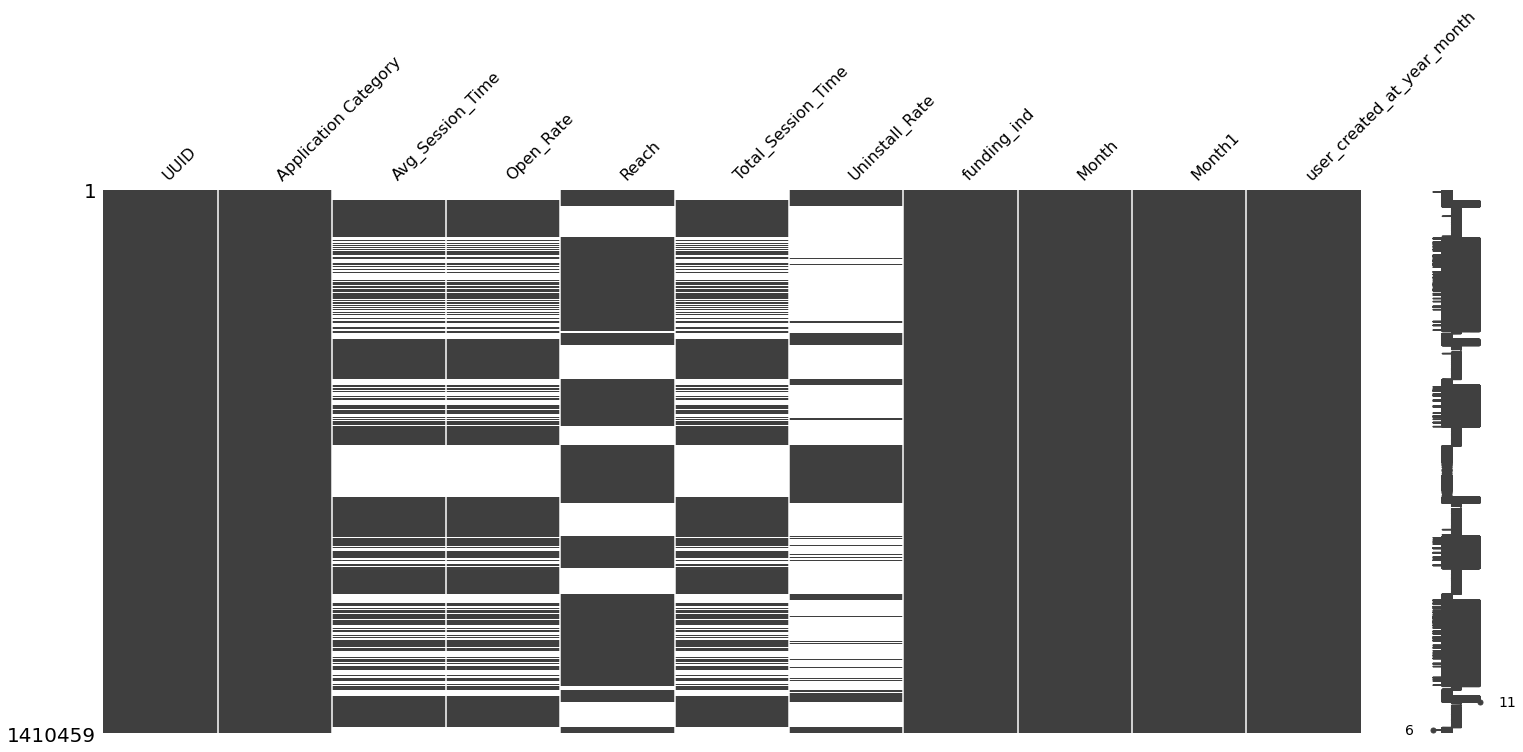

In [47]:
import missingno as msno
msno.matrix(not_funded_df)

In [48]:
df.head()

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
0,c1ad38e2d357610c129657d870ede902e8abfcb9,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,NaN,NaN,0.024443,0,8,2018-08-01,2018-08
1,d841e670d9191f896a0cbc75961920887b375756,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,NaN,NaN,0.009828,0,8,2018-08-01,2018-08
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,NaN,NaN,0.235294,0,8,2018-08-01,2018-08
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,0.350000,0,8,2018-08-01,2018-08
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,NaN,NaN,0.312500,0,8,2018-08-01,2018-08


# Lets analyse for a single startup

In [49]:
funded_df.head()

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
147,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,4087427.0,NaN,0.250000,1,8,2018-08-01,2018-08
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,4473029.0,NaN,0.274336,1,8,2018-08-01,2018-08
2324,cae68bf26bf59549fac77ec044954f939ab28c28,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,1220353.0,NaN,0.333333,1,8,2018-08-01,2018-08
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,1156045.0,NaN,NaN,1,8,2018-08-01,2018-08
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,34444.0,NaN,0.100000,1,8,2018-08-01,2018-08


In [50]:
df[df['UUID']=='0de5c3fb8362718a71754d77061259c809266dd1'].sort_values('Month1')

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
792227,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000224,4087427.0,NaN,0.078947,1,7,2018-07-01,2018-07
147,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,4087427.0,NaN,0.250000,1,8,2018-08-01,2018-08
716058,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000278,NaN,NaN,0.158730,0,9,2018-09-01,2018-09
805002,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000864,NaN,NaN,0.127451,0,10,2018-10-01,2018-10
818813,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001118,NaN,NaN,0.389899,0,11,2018-11-01,2018-11
745678,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001189,NaN,NaN,0.426136,0,12,2018-12-01,2018-12
1487611,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001187,NaN,NaN,0.203057,0,1,2019-01-01,2019-01
417724,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001225,NaN,NaN,0.289246,0,2,2019-02-01,2019-02
536884,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001013,NaN,NaN,0.234491,0,3,2019-03-01,2019-03
1104799,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000965,NaN,NaN,0.212963,0,4,2019-04-01,2019-04


In [51]:
len(df[df['UUID']=='0de5c3fb8362718a71754d77061259c809266dd1'].sort_values('Month1'))

24

In [52]:
startup_info_df = df.groupby('UUID')['funding_ind','Reach','Uninstall_Rate'].sum().reset_index().rename(columns = {'funding_ind':'total_funding_ind','Reach':'total_Reach','uninstall_Rate':'total_Uninstall_Rate'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [53]:
startup_info_df[startup_info_df['total_funding_ind']==0]

,UUID,total_funding_ind,total_Reach,Uninstall_Rate
0,000066f130e3b972364c505c805e2cddee68816d,0,5.388807e-06,0.00000
1,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,0,3.022203e-07,0.00000
2,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0,2.859197e-05,0.00000
3,000127cbe70aeeab81734b68f409176bd1f1fde8,0,4.994291e-07,0.00000
4,00017d2a013dc43f0e34de1be4beca443713ec80,0,1.972088e-07,0.00000
...,...,...,...,...
147736,fffe942f59aaf6d4a4119f1538cda1e4e69e9d8d,0,6.387665e-06,0.00000
147737,ffff383fa0831aa6d2c5d9257194d0d89841422d,0,3.378347e-05,0.00000
147738,ffff67b9dfc65a5f1f146d681497a933998c2256,0,5.246441e-03,0.89541
147739,ffff74dbc24df592b6355be32f5a71adeefb3b48,0,1.208881e-06,0.00000


In [54]:
startup_info_df[startup_info_df['total_funding_ind']!=0].sort_values('total_funding_ind')

,UUID,total_funding_ind,total_Reach,Uninstall_Rate
147197,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,1,3.215744e-03,5.005545
44987,4e46a6a3c536b63b67f5816c231b88a02c032f1c,1,2.734135e-05,0.000000
46497,50cdf7305b42ba4ffe94c7b482c7cbdd40963d69,1,9.975964e-06,0.000000
47785,52ee00cc6372077bcd4908da66fb2685cf22ed59,1,1.461693e-02,2.070117
49326,5597229475ccce5a3910ddfd4e392358aa5a6ee2,1,1.972088e-07,0.000000
...,...,...,...,...
35755,3e1f5f7fc1b9a26705ceb2639724a095778a4a31,43,6.894472e-04,0.000000
99762,ad2d8839fe42dbe607420f282eeaa37443357064,50,5.851945e-04,0.000000
30390,34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0,63,3.358232e-03,11.835856
135684,eb4744e148c3ff8682cf6b1cc804cde4e6129de0,99,1.191711e-03,0.000000


In [55]:
# Startup which never got funded
never_funded_startup = '000066f130e3b972364c505c805e2cddee68816d'
# Startup which got funded for only one time
funded_startup_1 = 'ff0e12c5ef5043e6dc8af2da006c45a918db9e79'
# Startup which got funded for 63 times
funded_startup_63 = '34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0'


In [56]:
never_funded_startup_df = df[df['UUID']==never_funded_startup]
funded_startup_1_df = df[df['UUID']==funded_startup_1]
funded_startup_63_df = df[df['UUID']==funded_startup_63]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


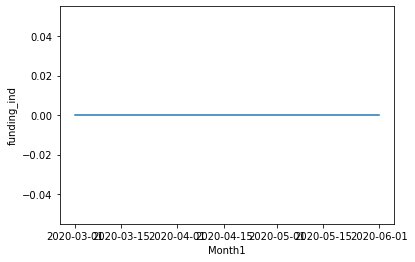

In [57]:
sns.lineplot(never_funded_startup_df['Month1'], never_funded_startup_df['funding_ind'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


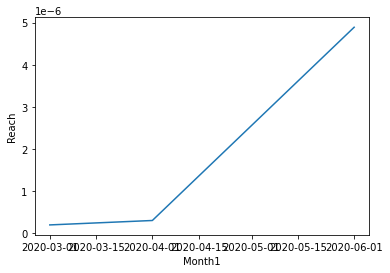

In [58]:
sns.lineplot(never_funded_startup_df['Month1'], never_funded_startup_df['Reach'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


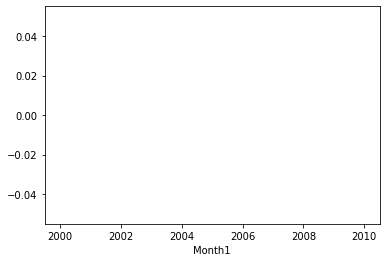

In [59]:
sns.lineplot(never_funded_startup_df['Month1'], never_funded_startup_df['Uninstall_Rate'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


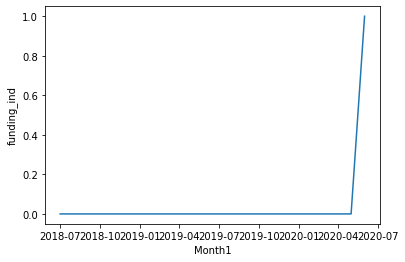

In [60]:
sns.lineplot(funded_startup_1_df['Month1'], funded_startup_1_df['funding_ind'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


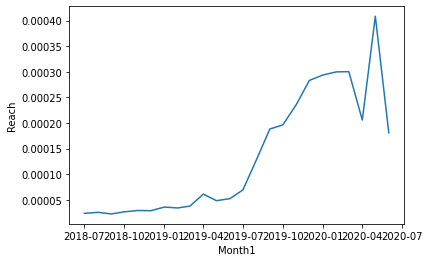

In [61]:
sns.lineplot(funded_startup_1_df['Month1'], funded_startup_1_df['Reach'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


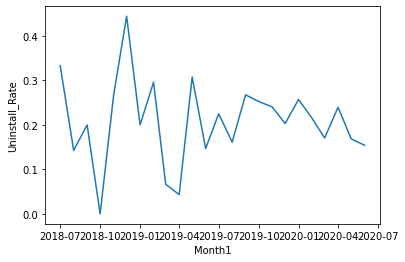

In [62]:
sns.lineplot(funded_startup_1_df['Month1'], funded_startup_1_df['Uninstall_Rate'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


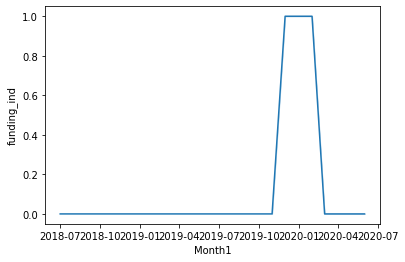

In [63]:
sns.lineplot(funded_startup_63_df['Month1'], funded_startup_63_df['funding_ind'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


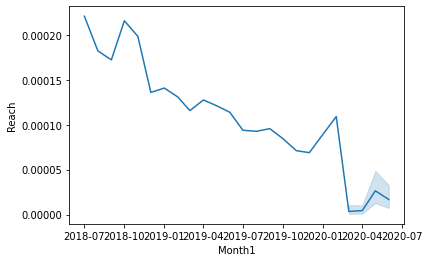

In [64]:
sns.lineplot(funded_startup_63_df['Month1'], funded_startup_63_df['Reach'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


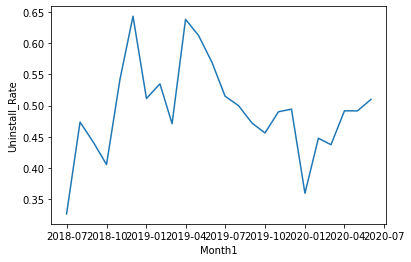

In [65]:
sns.lineplot(funded_startup_63_df['Month1'], funded_startup_63_df['Uninstall_Rate'])

In [66]:
df[df['UUID']==never_funded_startup]

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
276060,000066f130e3b972364c505c805e2cddee68816d,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.972088e-07,NaN,NaN,NaN,0,3,2020-03-01,2020-03
611818,000066f130e3b972364c505c805e2cddee68816d,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.889378e-06,NaN,NaN,NaN,0,6,2020-06-01,2020-06
1257143,000066f130e3b972364c505c805e2cddee68816d,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022203e-07,NaN,NaN,NaN,0,4,2020-04-01,2020-04


In [67]:
df[df['UUID']==funded_startup_1]

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
6363,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000026,NaN,NaN,0.142857,0,8,2018-08-01,2018-08
20909,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000052,NaN,NaN,0.147059,0,6,2019-06-01,2019-06
36928,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,Shopping,1.348429,NaN,NaN,NaN,NaN,NaN,NaN,0.584906,2.905983,NaN,NaN,0.000283,NaN,4.178491,0.203187,0,12,2019-12-01,2019-12
267096,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,Shopping,1.715670,NaN,NaN,NaN,NaN,NaN,NaN,0.023810,2.684062,NaN,NaN,0.000300,NaN,4.381783,0.170799,0,3,2020-03-01,2020-03
424799,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000034,NaN,NaN,0.296296,0,2,2019-02-01,2019-02
440286,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,Shopping,1.529866,NaN,NaN,NaN,NaN,NaN,NaN,0.338462,2.393411,NaN,NaN,0.000300,NaN,3.207804,0.215054,0,2,2020-02-01,2020-02
544082,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000038,NaN,NaN,0.066667,0,3,2019-03-01,2019-03
607968,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,Shopping,1.176330,Fashion Tech > B2C Commerce > Accessories > Je...,Bangalore,Series C,Fashion Tech,2015.0,2020-09-23,0.298507,2.298246,Internet-first brand of jewelry,Consumer\nRetail,0.000181,47422120.0,3.171058,0.154321,1,6,2020-06-01,2020-06
722433,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000022,NaN,NaN,0.200000,0,9,2018-09-01,2018-09
737195,ff0e12c5ef5043e6dc8af2da006c45a918db9e79,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000069,NaN,NaN,0.225000,0,7,2019-07-01,2019-07


In [68]:
df[df['UUID']==funded_startup_63]

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
10318,34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0,Travel & Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000182,NaN,NaN,0.473684,0,8,2018-08-01,2018-08
25680,34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0,Travel & Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000114,NaN,NaN,0.568966,0,6,2019-06-01,2019-06
41734,34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0,Travel & Local,2.633072,Internet First Insurance Platforms > Internet ...,Delhi,Seed,Internet First Insurance Platforms,2019.0,2020-03-26,0.775,4.559550,Usage-based health insurance platform for indi...,FinTech\nInsurTech,0.000069,805895.0,11.674347,0.494382,1,12,2019-12-01,2019-12
107678,34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0,Weather,1.498761,Internet First Insurance Platforms > Internet ...,Delhi,Seed,Internet First Insurance Platforms,2019.0,2020-03-26,NaN,3.730539,Usage-based health insurance platform for indi...,FinTech\nInsurTech,NaN,805895.0,4.308760,NaN,1,12,2019-12-01,2019-12
107679,34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0,Simulation,1.019566,Internet First Insurance Platforms > Internet ...,Delhi,Seed,Internet First Insurance Platforms,2019.0,2020-03-26,NaN,2.943820,Usage-based health insurance platform for indi...,FinTech\nInsurTech,NaN,805895.0,2.533949,NaN,1,12,2019-12-01,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472619,34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0,Action,3.418208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,6.836417,NaN,0,11,2019-11-01,2019-11
1472620,34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0,Lifestyle,5.364403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.666667,NaN,NaN,NaN,NaN,14.696428,NaN,0,11,2019-11-01,2019-11
1472622,34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0,Weather,1.437786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.714286,NaN,NaN,NaN,NaN,3.404093,NaN,0,11,2019-11-01,2019-11
1472624,34fb5fdd67d01b62867cd3496b1a73f0b8ae82a0,Travel & Local,6.153594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,18.460783,NaN,0,11,2019-11-01,2019-11


In [ ]:
startup_df.head()

In [ ]:
funded_df[funded_df['UUID']=='0de5c3fb8362718a71754d77061259c809266dd1']

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
147,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,4087427.0,NaN,0.250000,1,8,2018-08-01,2018-08
792227,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000224,4087427.0,NaN,0.078947,1,7,2018-07-01,2018-07


In [74]:
df.groupby('UUID', as_index = False).agg(list)

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
0,000066f130e3b972364c505c805e2cddee68816d,"[Business, Business, Business]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, 4.8893778266715565e-0...","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[0, 0, 0]","[3, 6, 4]","[2020-03-01 00:00:00, 2020-06-01 00:00:00, 202...","[2020-03, 2020-06, 2020-04]"
1,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,[Finance],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[3.022202611485277e-07],[nan],[nan],[nan],[0],[4],[2020-04-01 00:00:00],[2020-04]
2,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,"[Social, Social, Social, Social, Social]","[nan, 1.4710444444444446, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 3.0, 1.0, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.3665058954592075e-06, nan, 4.88937782667155...","[nan, nan, nan, nan, nan]","[nan, 4.413133333333334, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]","[3, 2, 6, 5, 4]","[2020-03-01 00:00:00, 2020-02-01 00:00:00, 202...","[2020-03, 2020-02, 2020-06, 2020-05, 2020-04]"
3,000127cbe70aeeab81734b68f409176bd1f1fde8,"[Personalization, Personalization, Personaliza...","[0.1902, 0.3642166666666667, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[2.0, 1.0, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, nan, 3.02220261148527...","[nan, nan, nan]","[0.3804, 0.3642166666666667, nan]","[nan, nan, nan]","[0, 0, 0]","[3, 5, 4]","[2020-03-01 00:00:00, 2020-05-01 00:00:00, 202...","[2020-03, 2020-05, 2020-04]"
4,00017d2a013dc43f0e34de1be4beca443713ec80,[Shopping],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[1.9720882462160069e-07],[nan],[nan],[nan],[0],[3],[2020-03-01 00:00:00],[2020-03]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147736,fffe942f59aaf6d4a4119f1538cda1e4e69e9d8d,"[Tools, Tools, Tools, Tools, Tools]","[0.3578083333333332, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.0, nan, 1.0, 1.0, 2.0]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 5.916264738648019e-07, 4.889377826671556...","[nan, nan, nan, nan, nan]","[0.7156166666666669, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]","[12, 3, 6, 5, 4]","[2019-12-01 00:00:00, 2020-03-01 00:00:00, 202...","[2019-12, 2020-03, 2020-06, 2020-05, 2020-04]"
147737,ffff383fa0831aa6d2c5d9257194d0d89841422d,"[Card, Card, Card, Card, Card, Card, Card, Car...","[13.552092152777774, 2.9301666666666666, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.55, 1.0, nan, 1.3205128205128205, 2.0327868...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.916264738648019e-07, 5.916264738648019e-07,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[34.2568120833333

In [80]:
df[~df['Avg_Session_Time'].isna()].head()

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
29180,c1ad38e2d357610c129657d870ede902e8abfcb9,Books & Reference,0.948620,NaN,NaN,NaN,NaN,NaN,NaN,0.645337,2.892748,NaN,NaN,0.020573,NaN,2.747994,0.027411,0,12,2019-12-01,2019-12
29181,d841e670d9191f896a0cbc75961920887b375756,Books & Reference,1.285343,NaN,NaN,NaN,NaN,NaN,NaN,0.470199,3.580697,NaN,NaN,0.004869,NaN,4.121214,0.017159,0,12,2019-12-01,2019-12
29182,0a59d138b3eaccd22b665eae70c756fef83ddb63,Finance,2.742948,NaN,NaN,NaN,NaN,NaN,NaN,0.111111,1.914286,NaN,NaN,0.000082,NaN,7.232086,0.108911,0,12,2019-12-01,2019-12
29183,0a59d138b3eaccd22b665eae70c756fef83ddb63,Books & Reference,1.040757,NaN,NaN,NaN,NaN,NaN,NaN,0.117647,22.712329,NaN,NaN,0.000030,NaN,22.515724,0.030303,0,12,2019-12-01,2019-12
29184,df5fb9891f77df24a91d039f1817c6c4e79244ef,Productivity,0.531213,NaN,NaN,NaN,NaN,NaN,NaN,0.517625,3.305187,NaN,NaN,0.001717,NaN,1.768690,0.286079,0,12,2019-12-01,2019-12


In [79]:
df[df['Application Category']=='Books & Reference']['Avg_Session_Time'].value_counts()

0.397567    3
0.019050    3
0.614050    3
0.302000    3
0.015083    3
           ..
0.019850    1
3.466288    1
2.508906    1
1.752496    1
1.027643    1
Name: Avg_Session_Time, Length: 42001, dtype: int64

# Missing Value Imputation

In [31]:
df['Latest Funded Date'].isnull().sum()

1410459

In [36]:
df.head()

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
0,c1ad38e2d357610c129657d870ede902e8abfcb9,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,NaN,NaN,0.024443,0,8,2018-08-01,2018-08
1,d841e670d9191f896a0cbc75961920887b375756,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,NaN,NaN,0.009828,0,8,2018-08-01,2018-08
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,NaN,NaN,0.235294,0,8,2018-08-01,2018-08
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,0.350000,0,8,2018-08-01,2018-08
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,NaN,NaN,0.312500,0,8,2018-08-01,2018-08


In [32]:
df.shape

(1412763, 21)

In [47]:
columns = ['UUID','Avg_Session_Time','Total_Session_Time','MAU','Open_Rate', 'Uninstall_Rate','Reach','funding_ind']

In [48]:
clean_df = df.copy()

In [49]:
clean_df.index = clean_df['Month1']
del clean_df['Month1']

In [50]:
clean_df = clean_df[columns]

In [51]:
clean_df.head()

,UUID,Avg_Session_Time,Total_Session_Time,MAU,Open_Rate,Uninstall_Rate,Reach,funding_ind
Month1,,,,,,,,
2018-08-01,c1ad38e2d357610c129657d870ede902e8abfcb9,NaN,NaN,NaN,NaN,0.024443,0.042963,0
2018-08-01,d841e670d9191f896a0cbc75961920887b375756,NaN,NaN,NaN,NaN,0.009828,0.003244,0
2018-08-01,0a59d138b3eaccd22b665eae70c756fef83ddb63,NaN,NaN,NaN,NaN,0.235294,0.000161,0
2018-08-01,0a59d138b3eaccd22b665eae70c756fef83ddb63,NaN,NaN,NaN,NaN,0.350000,0.000077,0
2018-08-01,df5fb9891f77df24a91d039f1817c6c4e79244ef,NaN,NaN,NaN,NaN,0.312500,0.000939,0


In [55]:
clean_df['UUID'].value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2654
a8febb4b767f83022235f3f34a2241ed1e13db2f    1670
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1529
ec1cd22193eda5ec91905247ea3079ae84e2dd30    1224
03fb932e41ef68f1df45e0b20f326de05ebd438c    1086
                                            ... 
8773ad3febc2106bfe562185a5d14f5491a5f8f7       1
be52b4de7c76b416a3d23d7c305fbf4811db4247       1
bf65078de52b49fbe68359b1e9940049beeba8c4       1
ac08d1ed9faa9b831dc3886899a600eec4a9db66       1
1c608a7453c22f25e2a1f8884c519e233c9749d9       1
Name: UUID, Length: 147741, dtype: int64

# Let's remove those startup that has less than 3 count frequency

In [57]:
counts = clean_df['UUID'].value_counts()

clean_df = clean_df[~clean_df['UUID'].isin(counts[counts < 5].index)]

In [58]:
clean_df['UUID'].value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2654
a8febb4b767f83022235f3f34a2241ed1e13db2f    1670
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1529
ec1cd22193eda5ec91905247ea3079ae84e2dd30    1224
03fb932e41ef68f1df45e0b20f326de05ebd438c    1086
                                            ... 
a1cf0d918d6a0940a3c545dc34dadb521f93b7c9       5
6ded9e9c8bb9e884623e93673b8dfc1cd38941dd       5
f33d01b38d004ca281bcc3159bc914de7f2ffc88       5
b5d63996cfb147544d3e8b2fc10a66fe0fbcfeeb       5
6f0ebe49f7237f9f814b62317c5c3390f252ca99       5
Name: UUID, Length: 62811, dtype: int64

# Interpolation

In [52]:
clean_df_interpolation = clean_df.groupby('UUID').resample('M').mean()

KeyboardInterrupt: ignored

In [37]:
for col in columns:
  clean_df[col] = df[col].fillna(df.groupby('UUID','Application Category')[col].transform('median'))

ValueError: ignored

In [76]:
clean_df.drop(['Business Models', 'City', 'Company Stage', 'Feed Name','Founded Year','Latest Funded Date', 'Practice Areas', 'Total Funding (USD)', 'Overview'], axis = 1, inplace = True)

In [77]:
clean_df.head()

,UUID,Application Category,Avg_Session_Time,MAU,Open_Rate,Reach,Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
0,c1ad38e2d357610c129657d870ede902e8abfcb9,Books & Reference,1.001348,0.349206,2.000000,0.042963,2.312478,0.024443,0,8,2018-08-01,2018-08
1,d841e670d9191f896a0cbc75961920887b375756,Books & Reference,1.001348,0.349206,2.000000,0.003244,2.312478,0.009828,0,8,2018-08-01,2018-08
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,Finance,0.781996,0.430599,2.821918,0.000161,2.318500,0.235294,0,8,2018-08-01,2018-08
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,Books & Reference,1.001348,0.349206,2.000000,0.000077,2.312478,0.350000,0,8,2018-08-01,2018-08
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,Productivity,0.601099,0.347826,2.875000,0.000939,1.830983,0.312500,0,8,2018-08-01,2018-08


In [78]:
clean_df.isnull().sum()

UUID                          969
Application Category            0
Avg_Session_Time                0
MAU                             0
Open_Rate                       0
Reach                           0
Total_Session_Time              0
Uninstall_Rate                  0
funding_ind                     0
Month                           0
Month1                          0
user_created_at_year_month      0
dtype: int64

In [79]:
clean_df.dropna(inplace = True)

In [80]:
clean_df.isnull().sum()

UUID                          0
Application Category          0
Avg_Session_Time              0
MAU                           0
Open_Rate                     0
Reach                         0
Total_Session_Time            0
Uninstall_Rate                0
funding_ind                   0
Month                         0
Month1                        0
user_created_at_year_month    0
dtype: int64

In [81]:
clean_df = clean_df.sort_values('Month1')

In [82]:
startup_clean_df = clean_df.groupby('UUID', as_index = False).agg(list)

# Feature Engineering

In [83]:
startup_clean_df.head()

,UUID,Application Category,Avg_Session_Time,MAU,Open_Rate,Reach,Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
0,000066f130e3b972364c505c805e2cddee68816d,"[Business, Business, Business]","[0.7250462962962962, 0.7250462962962962, 0.725...","[0.3961330095273679, 0.3961330095273679, 0.396...","[3.0, 3.0, 3.0]","[1.9720882462160069e-07, 3.022202611485277e-07...","[2.471595454545455, 2.471595454545455, 2.47159...","[0.07066381156316914, 0.07066381156316914, 0.0...","[0, 0, 0]","[3, 4, 6]","[2020-03-01 00:00:00, 2020-04-01 00:00:00, 202...","[2020-03, 2020-04, 2020-06]"
1,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,[Finance],[0.7819963142226509],[0.4305993690851735],[2.8219178082191783],[3.022202611485277e-07],[2.3184996445497634],[0.0714285714285714],[0],[4],[2020-04-01 00:00:00],[2020-04]
2,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,"[Social, Social, Social, Social, Social]","[1.4710444444444446, 0.7947097835988761, 0.794...","[0.4239401496259352, 0.4239401496259352, 0.423...","[3.0, 3.0260686928589076, 3.0260686928589076, ...","[1.0214713272998427e-05, 2.3665058954592075e-0...","[4.413133333333334, 2.513916666666667, 2.51391...","[0.1206896551724138, 0.1206896551724138, 0.120...","[0, 0, 0, 0, 0]","[2, 3, 4, 5, 6]","[2020-02-01 00:00:00, 2020-03-01 00:00:00, 202...","[2020-02, 2020-03, 2020-04, 2020-05, 2020-06]"
3,000127cbe70aeeab81734b68f409176bd1f1fde8,"[Personalization, Personalization, Personaliza...","[0.1902, 0.3298509803921568, 0.3642166666666667]","[0.3548387096774194, 0.3548387096774194, 0.354...","[2.0, 3.0, 1.0]","[1.9720882462160069e-07, 3.022202611485277e-07...","[0.3804, 1.1086215277777778, 0.3642166666666667]","[0.12658227848101267, 0.12658227848101267, 0.1...","[0, 0, 0]","[3, 4, 5]","[2020-03-01 00:00:00, 2020-04-01 00:00:00, 202...","[2020-03, 2020-04, 2020-05]"
4,00017d2a013dc43f0e34de1be4beca443713ec80,[Shopping],[1.0211179365618586],[0.3333333333333333],[2.414634146341464],[1.9720882462160069e-07],[2.6724536324786325],[0.11764705882352945],[0],[3],[2020-03-01 00:00:00],[2020-03]


In [84]:
def rolling_mean(row):
  window_month = 3
  numbers_series = pd.Series(row)
  windows = numbers_series.rolling(window_month)
  moving_averages = windows.mean()

  moving_averages_list = moving_averages.tolist()
  without_nans = moving_averages_list[window_month - 1:]
  return without_nans

In [85]:
columns

['Avg_Session_Time',
 'Total_Session_Time',
 'MAU',
 'Open_Rate',
 'Uninstall_Rate',
 'Reach']

In [86]:
startup_with_moving_mean = pd.DataFrame()

In [87]:
startup_clean_df.head()

,UUID,Application Category,Avg_Session_Time,MAU,Open_Rate,Reach,Total_Session_Time,Uninstall_Rate,funding_ind,Month,Month1,user_created_at_year_month
0,000066f130e3b972364c505c805e2cddee68816d,"[Business, Business, Business]","[0.7250462962962962, 0.7250462962962962, 0.725...","[0.3961330095273679, 0.3961330095273679, 0.396...","[3.0, 3.0, 3.0]","[1.9720882462160069e-07, 3.022202611485277e-07...","[2.471595454545455, 2.471595454545455, 2.47159...","[0.07066381156316914, 0.07066381156316914, 0.0...","[0, 0, 0]","[3, 4, 6]","[2020-03-01 00:00:00, 2020-04-01 00:00:00, 202...","[2020-03, 2020-04, 2020-06]"
1,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,[Finance],[0.7819963142226509],[0.4305993690851735],[2.8219178082191783],[3.022202611485277e-07],[2.3184996445497634],[0.0714285714285714],[0],[4],[2020-04-01 00:00:00],[2020-04]
2,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,"[Social, Social, Social, Social, Social]","[1.4710444444444446, 0.7947097835988761, 0.794...","[0.4239401496259352, 0.4239401496259352, 0.423...","[3.0, 3.0260686928589076, 3.0260686928589076, ...","[1.0214713272998427e-05, 2.3665058954592075e-0...","[4.413133333333334, 2.513916666666667, 2.51391...","[0.1206896551724138, 0.1206896551724138, 0.120...","[0, 0, 0, 0, 0]","[2, 3, 4, 5, 6]","[2020-02-01 00:00:00, 2020-03-01 00:00:00, 202...","[2020-02, 2020-03, 2020-04, 2020-05, 2020-06]"
3,000127cbe70aeeab81734b68f409176bd1f1fde8,"[Personalization, Personalization, Personaliza...","[0.1902, 0.3298509803921568, 0.3642166666666667]","[0.3548387096774194, 0.3548387096774194, 0.354...","[2.0, 3.0, 1.0]","[1.9720882462160069e-07, 3.022202611485277e-07...","[0.3804, 1.1086215277777778, 0.3642166666666667]","[0.12658227848101267, 0.12658227848101267, 0.1...","[0, 0, 0]","[3, 4, 5]","[2020-03-01 00:00:00, 2020-04-01 00:00:00, 202...","[2020-03, 2020-04, 2020-05]"
4,00017d2a013dc43f0e34de1be4beca443713ec80,[Shopping],[1.0211179365618586],[0.3333333333333333],[2.414634146341464],[1.9720882462160069e-07],[2.6724536324786325],[0.11764705882352945],[0],[3],[2020-03-01 00:00:00],[2020-03]


In [89]:
startup_with_moving_mean['UUID'] = startup_clean_df['UUID']
startup_with_moving_mean['moving_Avg_Session_Time'] = startup_clean_df['Avg_Session_Time'].apply(lambda x : rolling_mean(x))
startup_with_moving_mean['moving_Total_Session_Time'] = startup_clean_df['Total_Session_Time'].apply(lambda x : rolling_mean(x))
startup_with_moving_mean['moving_MAU'] = startup_clean_df['MAU'].apply(lambda x : rolling_mean(x))
startup_with_moving_mean['moving_Open_Rate'] = startup_clean_df['Open_Rate'].apply(lambda x : rolling_mean(x))
startup_with_moving_mean['moving_Uninstall_Rate'] = startup_clean_df['Uninstall_Rate'].apply(lambda x : rolling_mean(x))
startup_with_moving_mean['moving_Reach'] = startup_clean_df['Reach'].apply(lambda x : rolling_mean(x))

In [90]:
startup_with_moving_mean['Application Category'] = startup_clean_df['Application Category']

In [92]:
startup_with_moving_mean['funding_ind'] = startup_clean_df['funding_ind']

In [93]:
startup_with_moving_mean.head()

,UUID,moving_Avg_Session_Time,moving_Total_Session_Time,moving_MAU,moving_Open_Rate,moving_Uninstall_Rate,moving_Reach,Application Category,funding_ind
0,000066f130e3b972364c505c805e2cddee68816d,[0.7250462962962962],[2.471595454545455],[0.3961330095273679],[3.0],[0.07066381156316914],[1.796268970813895e-06],"[Business, Business, Business]","[0, 0, 0]"
1,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,[],[],[],[],[],[],[Finance],[0]
2,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,"[1.020154670547399, 0.794709783598876, 0.69200...","[3.1469888888888895, 2.5139166666666672, 1.838...","[0.4239401496259352, 0.4239401496259352, 0.423...","[3.017379128572605, 3.026068692858908, 2.35071...","[0.1206896551724138, 0.1206896551724138, 0.120...","[4.4959599839677386e-06, 7.900864408300549e-06...","[Social, Social, Social, Social, Social]","[0, 0, 0, 0, 0]"
3,000127cbe70aeeab81734b68f409176bd1f1fde8,[0.2947558823529412],[0.6177460648148149],[0.3548387096774193],[2.0],[0.12658227848101267],[1.7783177547155237e-06],"[Personalization, Personalization, Personaliza...","[0, 0, 0]"
4,00017d2a013dc43f0e34de1be4beca443713ec80,[],[],[],[],[],[],[Shopping],[0]


In [94]:
startup_with_moving_mean[startup_with_moving_mean.astype(str)['moving_Avg_Session_Time'] != '[]']

,UUID,moving_Avg_Session_Time,moving_Total_Session_Time,moving_MAU,moving_Open_Rate,moving_Uninstall_Rate,moving_Reach,Application Category,funding_ind
0,000066f130e3b972364c505c805e2cddee68816d,[0.7250462962962962],[2.471595454545455],[0.3961330095273679],[3.0],[0.07066381156316914],[1.796268970813895e-06],"[Business, Business, Business]","[0, 0, 0]"
2,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,"[1.020154670547399, 0.794709783598876, 0.69200...","[3.1469888888888895, 2.5139166666666672, 1.838...","[0.4239401496259352, 0.4239401496259352, 0.423...","[3.017379128572605, 3.026068692858908, 2.35071...","[0.1206896551724138, 0.1206896551724138, 0.120...","[4.4959599839677386e-06, 7.900864408300549e-06...","[Social, Social, Social, Social, Social]","[0, 0, 0, 0, 0]"
3,000127cbe70aeeab81734b68f409176bd1f1fde8,[0.2947558823529412],[0.6177460648148149],[0.3548387096774193],[2.0],[0.12658227848101267],[1.7783177547155237e-06],"[Personalization, Personalization, Personaliza...","[0, 0, 0]"
5,0001ef9403a3bb9d7d673d10b5d082a536acaa0a,"[1.1337130446623092, 1.344176466136668, 1.2748...","[2.949131209150327, 8.363247875816993, 7.25582...","[0.31932773109243695, 0.31932773109243695, 0.3...","[2.4901960784313726, 4.990196078431373, 3.9901...","[0.07482993197278909, 0.07482993197278909, 0.0...","[4.7057832650061085e-06, 4.083391526610682e-06...","[Medical, Medical, Medical, Medical, Medical, ...","[0, 0, 0, 0, 0, 0]"
8,00033006be474a18f422eb285da9b761023b09e1,"[1.1406728822384091, 1.0800636178300973, 1.036...","[5.000045474214775, 4.8864717438285155, 4.4960...","[0.375, 0.375, 0.375, 0.375, 0.375, 0.375]","[4.558587912602551, 4.676807237078234, 4.41274...","[0.14698339523300435, 0.14698339523300435, 0.1...","[4.8893778266715565e-06, 4.8893778266715565e-0...","[Entertainment, Entertainment, Entertainment, ...","[0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...
147735,fffe61bbf17e9a2d8e5bd43b1b964edcb7b66e3f,"[0.7703912736153082, 0.7703912736153082, 0.770...","[2.1600549081563867, 2.1600549081563867, 2.160...","[0.2919285521578943, 0.2919285521578943, 0.291...","[2.51739898989899, 2.51739898989899, 2.5173989...","[0.09327356659773035, 0.09327356659773035, 0.0...","[3.2868137436933443e-07, 3.636851865449768e-07...","[Food & Drink, Travel & Local, Productivity, F...","[0, 0, 0, 0, 0, 0, 0]"
147736,fffe942f59aaf6d4a4119f1538cda1e4e69e9d8d,"[0.5762562288260079, 0.640931228826008, 0.55995]","[1.36442781419571, 1.3098333697512656, 0.84598...","[0.37288135593220345, 0.37288135593220345, 0.3...","[2.3333333333333335, 2.0, 1.3333333333333333]","[0.08597285067873306, 0.08597285067873306, 0.0...","[5.388806912441684e-06, 5.388806912441684e-06,...","[Tools, Tools, Tools, Tools, Tools]","[0, 0, 0, 0, 0]"
147737,ffff383fa0831aa6d2c5d9257194d0d89841422d,"[6.04413715800478, 7.501343176523297, 7.999252...","[17.44379126344086, 25.04258015232975, 26.1050...","[0.6245300751879699, 0.6245300751879699, 0.624...","[3.038978494623656, 3.3723118279569895, 3.2560...","[0.12440532825880113, 0.12440532825880113, 0.1...","[2.0429426545996854e-05, 2.0429426545996854e-0...","[Card, Card, Card, Card, Card, Card, Card, Car...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
147738,ffff67b9dfc65a5f1f146d681497a933998c2256,"[1.0013476100915255, 1.0013476100915255, 1.001...","[2.3124778180354246, 2.3124778180354246, 2.312...","[0.34920634920634913, 0.34920634920634913, 0.3...","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[0.042526455026433325, 0.03141534391533333, 0....","[0.0001822638919220848, 0.0002064289878552202,...","[Books & Reference, Books & Reference, Books &...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
startup_with_moving_mean['moving_Avg_Session_Time'].apply(pd.Series)

In [149]:
moving_avg_session

0                                      [0.7250462962962962]
1                                                        []
2         [1.020154670547399, 0.794709783598876, 0.69200...
3                                      [0.2947558823529412]
4                                                        []
                                ...                        
147736     [0.5762562288260079, 0.640931228826008, 0.55995]
147737    [6.04413715800478, 7.501343176523297, 7.999252...
147738    [1.0013476100915255, 1.0013476100915255, 1.001...
147739                                                   []
147740                                  [1.792447477689788]
Name: Avg_Session_Time, Length: 147741, dtype: object

In [141]:
window_month = 3
numbers_series = pd.Series(startup_clean_df.loc[2,'Avg_Session_Time'])
windows = numbers_series.rolling(window_month)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
without_nans = moving_averages_list[window_month - 1:]
print(without_nans)

[1.020154670547399, 0.794709783598876, 0.6920065223992506]


In [135]:
startup_clean_df.loc[3,'Avg_Session_Time']

[0.1902, 0.3298509803921568, 0.3642166666666667]

In [134]:
moving_mean_df.tail()

,Avg_Session_Time,MAU,Open_Rate,Reach,Total_Session_Time,Uninstall_Rate
1411787,2.516407,0.526071,2.216667,0.000015,3.627134,0.286679
1411788,2.083096,0.447291,2.216667,0.000008,2.760512,0.210673
1411789,3.365095,0.442460,1.933333,0.000005,4.087097,0.262723
1411790,1.853486,0.360405,1.633333,0.000008,2.241403,0.152737
1411791,2.623304,0.423172,1.740252,0.000028,4.056568,0.201386
